<a href="https://colab.research.google.com/github/RR-Priyadharshini/Student_Performance_Visualization/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Display settings
pd.set_option('display.max_columns', None)

In [3]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Create a sample dataset of students
data = {
    'student_id': [1,2,3,4,5,6,7,8,9,10],
    'name': ['Ananya','Karthik','Sneha','Rajesh','Divya','Pranav','Aishwarya','Vignesh','Meena','Arjun'],
    'age': [18,19,18,20,18,19,19,18,19,19],
    'gender': ['F','M','F','M','F','M','F','M','F','M'],
    'study_hours_per_day': [2.5,3.0,4.5,1.5,5.0,2.0,4.0,1.0,3.5,2.5],
    'sleep_hours': [7.0,6.5,8.0,5.5,7.5,6.0,8.0,5.0,7.0,6.5],
    'diet_quality': ['Good','Average','Excellent','Poor','Good','Average','Excellent','Poor','Good','Average'],
    'part_time_job': ['No','Yes','No','Yes','No','Yes','No','Yes','No','Yes'],
    'exam_score': [78,72,91,65,80,77,83,59,70,86]
}

# Step 3: Convert to DataFrame
df = pd.DataFrame(data)

# Step 4: Save and preview
df.to_csv('student_performance.csv', index=False)
df.head()

,student_id,name,age,gender,study_hours_per_day,sleep_hours,diet_quality,part_time_job,exam_score
0,1,Ananya,18,F,2.5,7.0,Good,No,78
1,2,Karthik,19,M,3.0,6.5,Average,Yes,72
2,3,Sneha,18,F,4.5,8.0,Excellent,No,91
3,4,Rajesh,20,M,1.5,5.5,Poor,Yes,65
4,5,Divya,18,F,5.0,7.5,Good,No,80


In [4]:
# Step 2: Feature selection and data standardization

from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['study_hours_per_day', 'sleep_hours', 'exam_score']
X = df[features]

# Standardize the data (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Preview scaled data
X_scaled.head()

,study_hours_per_day,sleep_hours,exam_score
0,-0.364698,0.314485,0.205253
1,0.040522,-0.209657,-0.442913
2,1.256183,1.362770,1.609612
3,-1.175139,-1.257942,-1.199107
4,1.661404,0.838628,0.421308


In [5]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,0.091308,0.310889
1,-0.345657,-0.339473
2,2.431822,0.329970
3,-2.096895,-0.065156
4,1.699275,-0.754967


In [6]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 3 clusters (you can change if needed)
kmeans = KMeans(n_clusters=3, random_state=0)
pca_df['cluster'] = kmeans.fit_predict(X_scaled)

# View data with cluster labels
pca_df.head()

,PCA1,PCA2,cluster
0,0.091308,0.310889,0
1,-0.345657,-0.339473,0
2,2.431822,0.329970,1
3,-2.096895,-0.065156,2
4,1.699275,-0.754967,1


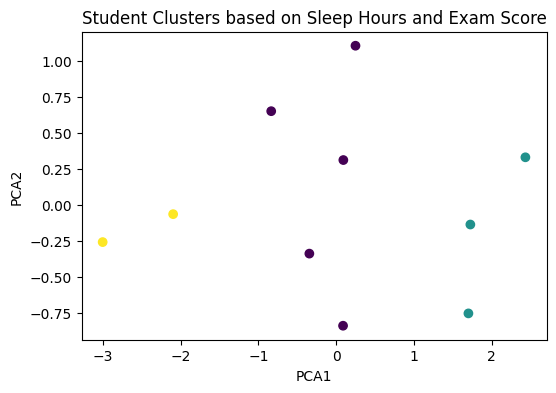

In [7]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(6, 4))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis')
plt.title('Student Clusters based on Sleep Hours and Exam Score')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

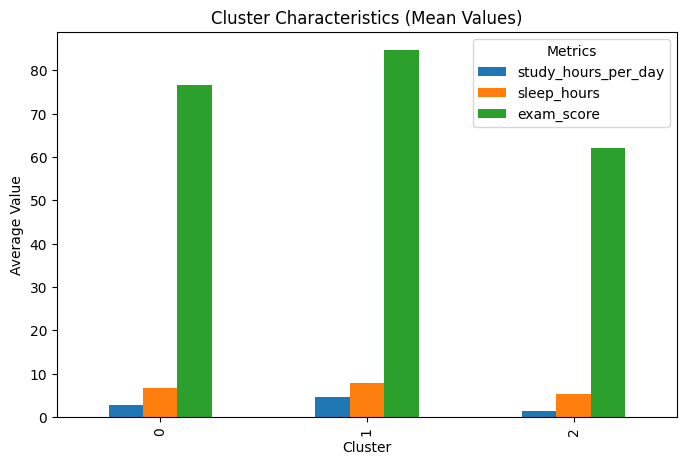

In [9]:
# Add cluster labels to original data
df_clustered = pd.concat([df, pca_df['cluster']], axis=1)

# Calculate mean of key metrics per cluster
cluster_means = df_clustered.groupby('cluster')[['study_hours_per_day','sleep_hours','exam_score']].mean()

# Plot
cluster_means.plot(kind='bar', figsize=(8,5))
plt.title('Cluster Characteristics (Mean Values)')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Metrics')
plt.show()

/tmp/ipython-input-2883997537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='exam_score', data=df_clustered, palette='Set2')


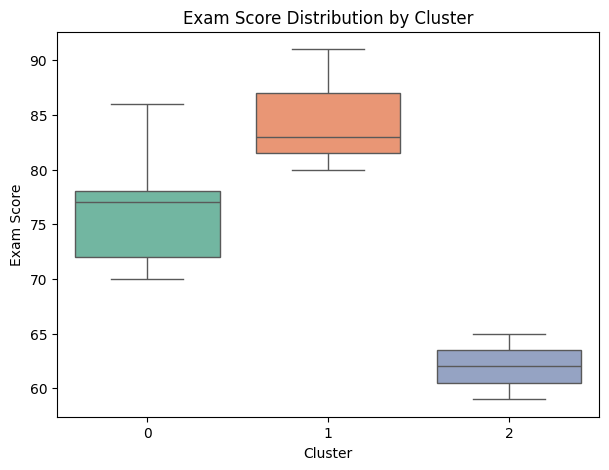

In [10]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(x='cluster', y='exam_score', data=df_clustered, palette='Set2')
plt.title('Exam Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Exam Score')
plt.show()

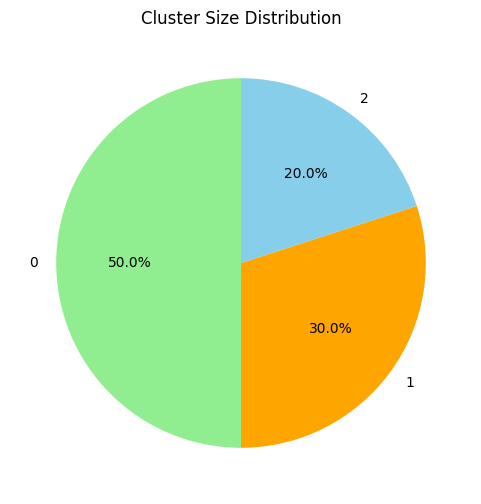

In [11]:
plt.figure(figsize=(6,6))
sizes = df_clustered['cluster'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','orange','skyblue'])
plt.title('Cluster Size Distribution')
plt.show()